# Homework 4
**Total Points: 5**

**Instructions:**
1. Complete parts 1 through 4, filling in code or responses where marked with `# YOUR CODE HERE` or `# YOUR ANALYSIS HERE`.
2. The libraries you need, in the order you need them, have already been coded. Do not import additional libraries or move import commands.
3. When finished, run the full notebook by selecting <b>Kernel > Restart & Run All</b>. </li>
4. Submit this completed notebook file to <b>NYU Classes</b>. </li>

This assignment contains a subfolder called `audio` which has 8 short audio files. You may use these files for your analysis.

**Grading:** Parts 1, 2 and 4 are worth 1 point. Part 3 is worth 2 points.

**Important Note**: The way you implement the code in your work for each assignment is entirely up to you. There are often many ways to solve a particular problem, so use whatever method works for you; the output is what is evaluated. The only requirement is that you follow the instructions, which may prohibit or require certain libraries or commands.



In [1]:
import numpy as np
import librosa
from librosa import feature
from librosa import display
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy.fftpack import fft, dct

## Part 1: Feature Extraction
Create a function `extract_feature()` that will extract a chosen feature from an input audio signal. You may use Librosa for all feature extractions. When necessary, `hop_length` should be `win_length/2`.

In [2]:
def extract_feature(x, feature, win_length):
    
    """ Calulate one of three different features from an input signal
    
    Parameters
    ----------
    
    x: np.array
        input audio
    
    feature: string
        One of the following: 'spec_cent', 'rms', or 'zcr'
    
    win_length: int
        window length, frame length, or n_fft
        
    Returns
    -------
    
    out: np.array
        vector of specified feature
        
    """
    hop_length = int(win_length/2)
    spec_cent = librosa.feature.spectral_centroid(x, 44100)[0] #spectral centroid
    rms = librosa.feature.rms(x, win_length, hop_length)[0] # Root Mean Square Energy
    zcr = librosa.feature.zero_crossing_rate(x,win_length, hop_length)[0] #zero crossing rate
    if feature == "spec_cent": # if strings match
        return spec_cent
    if feature == "rms":
        return rms
    if feature == "zcr":
        return zcr

## Part 2: Plot Features
Create a function `plot_features()` which will create a pyplot with 4 subplots arranged vertically. The top subplot should be the raw audio waveform and each lower subplot should one of the features from Part 1. Label everything correctly.
    

In [3]:
def plot_features(x, fs, win_length):
    
    """ Plot a an audio signal and 3 extracted features
    
    Parameters
    ----------
    
    x: np.array
        input audio
        
    fs: int
        sample rate
    
    win_length: int
        window length, frame length, or n_fft
    
        
    Returns
    -------
    
    none
        
    """
    spec_cent = extract_feature(x, "spec_cent", win_length) # calls extract_feature 3 times
    rms = extract_feature(x, "rms", win_length)
    zcr = extract_feature(x, "zcr", win_length)

    # change from samples to time
    hop_length = int(win_length/2)
    
    frames = range(len(x))
    t = librosa.frames_to_time(frames, hop_length)

    plt.figure(figsize=(15, 17))

    ax = plt.subplot(4, 1, 1)
    librosa.display.waveplot(x, fs);
    plt.title("Audio File")

    frames = range(len(spec_cent))
    t = librosa.frames_to_time(frames, hop_length)
    plt.subplot(4, 1, 2)
    plt.plot(spec_cent)
    plt.title("Spec_cent")

    frames = range(len(rms))
    t = librosa.frames_to_time(frames, hop_length)
    plt.subplot(4, 1, 3)
    plt.plot(t, rms)
    plt.title("RMS")
    
    frames = range(len(zcr))
    t = librosa.frames_to_time(frames, hop_length)
    plt.subplot(4, 1, 4)
    plt.plot(t, zcr)
    plt.title("ZCR")

    plt.show()
    

# Part 3: MFCCs
Create a function `show_mfccs()` using the following process:

1. Generate a Spectrogram from the input signal.
2. Create a Mel filter.
3. Use the Mel filter to convert the Spectrogram to a Mel Spectrogram.
4. Convert the Mel Spectrogram to dB.
5. Generate a discrete cosine transform (DCT) filter.
6. Use the DCT to convert the Mel Spectrogram into MFCCs.
7. Use `imshow` to display the MFCCs.

You can use any function in Librosa that you want, except for `librosa.feature.mfcc()` and `librosa.feature_melspectrogram()`. All of these functions are available in Librosa, you just have to put the pieces together. Make sure the origin of the final MFCC image is on the bottom-left.

**Hint**: You will have to perform matrix multiplication twice in this function (steps 3 and 6). To multiply two matrices, the inner dimensions must match. For example, when multiplying $(a, b)$ with $(c, d)$ $b$ and $c$ have to be equal. You can check the shape of a matrix by using print(matrixName.shape). Use matrixName.T to transform the matrix if necessary to make the inner dimensions match. Use `np.matmul()` to perform the multiplication.

**This part is worth 2 points.**

In [4]:
# Uncomment this function if you need it (from Librosa)
"""
def dct(n_mfccs, n_mels):
    basis = np.empty((n_filters, n_input))
    basis[0, :] = 1.0 / np.sqrt(n_input)

    samples = np.arange(1, 2*n_input, 2) * np.pi / (2.0 * n_input)

    for i in range(1, n_filters):
        basis[i, :] = np.cos(i*samples) * np.sqrt(2.0/n_input)

    return basis
"""

def show_mfccs(x, fs, n_fft, n_mels, n_mfccs):
    
    """ Calculate and display MFCCs for an input audio signal
    
    Parameters
    ----------
    
    x: np.array
        input ausio
    
    fs: int
        sample rate
    
    n_fft: int
        number of fft points (win_length)
        
    n_mels: int
         number of mel filters (try 40)
    
    n_mfccs: int
        number of mfcc coefficients (try 13)
      
    
    Returns
    -------
    
    none

    """
    
    # 1 Generate a Spectrogram from the input signal.
    hop_length = 512
    D = np.abs(librosa.stft(x, n_fft=n_fft,  hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    # 2 Create a Mel filter.
    mel = librosa.filters.mel(sr=fs, n_fft=n_fft, n_mels=n_mels) 

    # 3 Use the Mel filter to convert the Spectrogram to a Mel Spectrogram.
    melSpec = np.matmul(mel,DB) #975 in x as time by 40 in y as mels
    
    # 4 Convert the Mel Spectrogram to dB.
    melSpec_db = 20 * np.log10 ( melSpec/ np.max(melSpec)) 
    
    # 5 Generate a discrete cosine transform (DCT) filter.
    dct_filter = dct(melSpec_db, type=2, axis=1, norm='ortho')[:, 1 : (n_mfccs + 1)] # Keep 2-13

    # 6 Use the DCT to convert the Mel Spectrogram into MFCCs. 
    mfcc_data = np.matmul(dct_filter.T, melSpec_db) # ends up 975 by 13

    # 7 Use imshow to display the MFCCs.    
    plt.imshow(mfcc_data, origin='lower', aspect='auto', interpolation='nearest')
    plt.colorbar(format='%+2.0f dB');
    plt.ylabel('MFCC Coefficient Index')
    plt.xlabel('Time as Frame Index')

## Part 4: Analysis
Using your code in Parts 1 - 3 and the audio files in the `/audio` subfolder, report on the characteristics of the sound with regard to the features. What do the features tell you, and how do the features change over time? How might this information be exploited? In your analysis, include full plots (using `plot_features()` from Part 2. Also include at least 2 MFCC plots (from Part 3) and comment on their similarities or differences. Analyze at least 3 audio files.

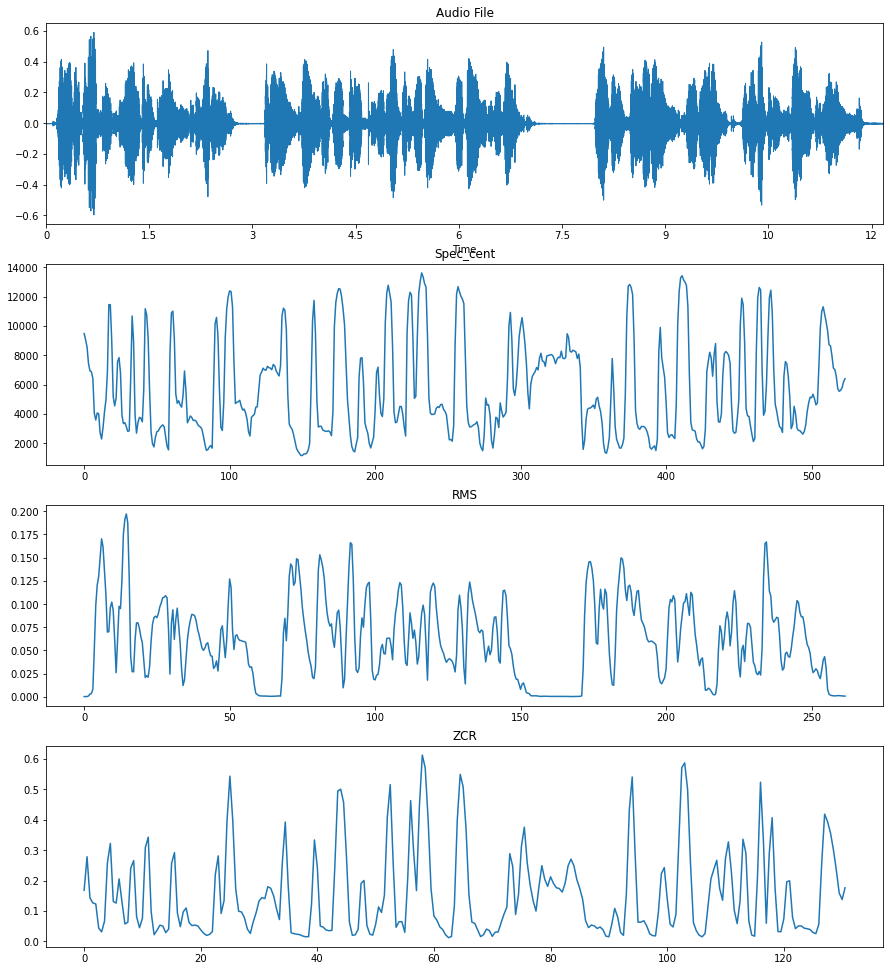

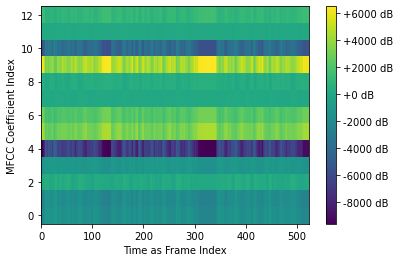

In [5]:
x, fs = librosa.load('audio/poem.aif')
#x, fs = librosa.load('audio/action.aif') # replace text after 'audio' with the file name
win_length = 2048
plot_features(x, fs, win_length)
n_mels = 40
n_mfccs = 13
show_mfccs(x, fs, win_length, n_mels, n_mfccs) 

`## 1. Action.aif has a lot of precussive elements that are visible in the waveform as well as the rms plot. The MFCCs show a lot of energy in coefficients 1 and 11 especially. You can also see the percussive hits in time.
2. Drums.aif is similar, the percussive hits are visible in MFCCs, but here the energy is in coefficients 6 and 7.
3. Voice.aif is a tenor/bass singer singing in a reverberant space. There is most energy in MFCC cofficient 1. Around six seconds in, the vocalist pauses and resumes with a more resonant sound, and that is visible in the audio waveform, spectral centroid, rms, and zero crossing plots. Less is visible as time goes on in the MFCC plot. 
4. The poem is a dry, spoken sound. It is again a lower register voice. There is a lot of change along the time axis. Percussive sounds are visible, and you can also see the pauses the speaker takes at around 3 and 7 seconds on the MFCC plot. MFCCs work very well, providing a lot of information for this audio file.
5. The strauss and beethoven wav forms have most energy in the 0th MFCC coefficient and not much information in the rest of the coefficients. I would say the MFCCs do not give much information for these full-orchestral recorings. Perhaps another method would be better.

``